#### This notebook describes: 

#### 1) how figure 2a was created from the cell type deconvolution values

In [ ]:
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
import os
import sys
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors

#import scvi
import anndata as ad

import warnings
warnings.filterwarnings("ignore")

from collections import Counter

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

plt.rcParams['figure.figsize'] = (6, 6)

from IPython.core.display import display, HTML
import random

#Define a colour map for gene expression
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
#colorsComb = np.vstack([colors3, colors2])
#mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)
from matplotlib import colors
colorsComb = np.vstack([plt.cm.Reds(np.linspace(0, 1, 128)), plt.cm.Greys_r(np.linspace(0.7, 0.8, 0))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

# Helper function to split list in chunks
def chunks(lista, n):
    for i in range(0, len(lista), n):
        yield lista[i:i + n]
        
        plt.rcParams['figure.figsize'] = (6, 5)
sc.set_figure_params(dpi=100, vector_friendly=True)
def mysize(w, h, d):
    fig, ax = plt.subplots(figsize = (w, h), dpi = d)
    return(fig.gca())
plt.rcParams['figure.figsize'] = (6, 5)
sc.set_figure_params(dpi=100, vector_friendly=True)
sc.settings.figdir = "./figures/"

In [2]:
import scvi

Global seed set to 0


In [3]:
## frequently used variables
from matplotlib import colors
import matplotlib.pyplot as plt
colorsComb = np.vstack([plt.cm.Reds(np.linspace(0, 1, 128)), plt.cm.Greys_r(np.linspace(0.7, 0.8, 0))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

## Along these Lines, a colourmap diverging from gray to red
gray_red = colors.LinearSegmentedColormap.from_list("grouping", ["lightgray", "red", "darkred"], N = 128)

## Some more Colour Maps
gray_violet = colors.LinearSegmentedColormap.from_list("grouping", ["lightgray", "mediumvioletred", "indigo"], N = 128)
gray_blue = colors.LinearSegmentedColormap.from_list("grouping", ["lightgray", "cornflowerblue", "darkblue"], N = 128)


def mysize(w, h, d):
    fig, ax = plt.subplots(figsize = (w, h), dpi = d)
    return(fig.gca())
#plt.rcParams['figure.figsize'] = (6, 5)
#sc.set_figure_params(dpi=120, vector_friendly=True)

In [4]:
import matplotlib.colors as colors
c_low = colors.colorConverter.to_rgba('orange', alpha = 0)
c_high = colors.colorConverter.to_rgba('red',alpha = 1)
cmap_transparent = colors.LinearSegmentedColormap.from_list('rb_cmap',[c_low, c_high], 512)

In [5]:
import matplotlib.colors as colors
c_low2 = colors.colorConverter.to_rgba('green', alpha = 0)
c_high2 = colors.colorConverter.to_rgba('darkblue',alpha = 1)
cmap_transparent2 = colors.LinearSegmentedColormap.from_list('rb_cmap',[c_low2, c_high2], 512)

In [7]:
print(f"squidpy=={sq.__version__}")
print(f"scanpy=={sc.__version__}")

squidpy==1.2.3
scanpy==1.9.3


In [11]:
import cell2location as c2l
from cell2location.utils import select_slide

# load data

In [ ]:
##load
adata_vis = sc.read(f"/.h5ad")

In [ ]:
adata_vis

AnnData object with n_obs × n_vars = 57787 × 12486
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'n_genes', 'leiden', 'leiden_15', 'leiden_2', 'leiden_25', 'sampleID', 'treatment', 'VisiumSlides', 'technology', '_indices', '_scvi_batch', '_scvi_labels', 'AT0', 'AT1', 'AT2', 'Aberrant basaloid', 'Adventitial fibroblast', 'Alveolar fibroblast', 'Artery', 'B/Plasma', 'Basal', 'Basophil/Mast', 'Bronchial Vessel', 'Capillary', 'Capillary Aerocyte', 'Ciliated', 'Ciliated SFTPB+/SCGB1A1+', 'Dendritic', 'Ionocyte', 'Lymphatic', 'Macrophage C1Q hi', 'Macrophage CHI3L1+/CD9 hi/', 'Macrophage FABP4+', 'Macrophage IL1B+', 'Macrophage LYVE1+', 'Macrophage RETN+/VCAN+', 'Mesothelial', 'Monocyte', 'Mucous', 'Myofibroblast', 'NK', 'Peribronchial fibroblast', 'Pericyte', 'S

In [ ]:
cts = ['AT0', 'AT1', 'AT2', 'Aberrant basaloid', 'Adventitial fibroblast', 'Alveolar fibroblast',
       'Artery', 'B/Plasma', 'Basal', 'Basophil/Mast', 'Bronchial Vessel', 'Capillary', 'Capillary Aerocyte',
       'Ciliated', 'Ciliated SFTPB+/SCGB1A1+', 'Dendritic', 'Ionocyte', 'Lymphatic', 'Macrophage C1Q hi',
       'Macrophage CHI3L1+/CD9 hi/', 'Macrophage FABP4+', 'Macrophage IL1B+', 'Macrophage LYVE1+', 
       'Macrophage RETN+/VCAN+', 'Mesothelial', 'Monocyte', 'Mucous', 'Myofibroblast', 'NK', 
       'Peribronchial fibroblast', 'Pericyte', 'Smooth Muscle', 'T cell', 'TB-SC', 'Vein', 'pDC', 'preTB-SC/RAS']

## within Niche per treatment

## play around with the code to scale cts data

In [41]:
tab = sc.get.obs_df(adata_vis, keys= ["sampleID","Niche_NMF","treatment"]+ cts)

In [79]:
ct_label = "cell_type"
group_by = "sampleID"
xlabel = "Niche_NMF"
ctss = cts
#cm = "sampleID"

tab = tab.loc[:, ctss + [xlabel]].copy()
tab.head()

,AT0,AT1,AT2,Aberrant basaloid,Adventitial fibroblast,Alveolar fibroblast,Artery,B/Plasma,Basal,Basophil/Mast,...,NK,Peribronchial fibroblast,Pericyte,Smooth Muscle,T cell,TB-SC,Vein,pDC,preTB-SC/RAS,Niche_NMF
spot_id,,,,,,,,,,,,,,,,,,,,,
90_A1_H237762_IPF_processed_CM_AAACAAGTATCTCCCA-1,0.001162,0.012275,0.000589,0.002108,0.203605,1.176494,0.027367,0.824555,0.265306,0.053716,...,0.014663,0.043533,0.221838,0.147173,0.034529,0.001803,0.106638,0.008943,0.002292,Fibroblast
90_A1_H237762_IPF_processed_CM_AAACACCAATAACTGC-1,0.284728,0.797208,0.466162,0.047545,0.064358,0.038488,0.030167,0.072710,0.001503,0.004011,...,0.137339,0.054350,0.763590,0.010048,0.034626,0.005220,0.010705,0.020047,0.002497,Alveolar
90_A1_H237762_IPF_processed_CM_AAACAGCTTTCAGAAG-1,0.006953,0.053596,0.013402,0.002963,0.061115,0.068147,0.065031,0.011949,0.001548,0.008882,...,0.059556,0.016156,1.338197,0.083706,0.073377,0.001867,0.006160,0.004211,0.000564,Alveolar
90_A1_H237762_IPF_processed_CM_AAACAGGGTCTATATT-1,0.004011,0.052910,0.002612,0.035115,0.070470,0.676508,0.018409,0.302522,0.000960,0.181993,...,0.030098,0.305133,0.034607,1.580754,0.189599,0.004437,0.026316,0.027901,0.007598,SMCs_Adv_Meso
90_A1_H237762_IPF_processed_CM_AAACATTTCCCGGATT-1,0.008899,0.018407,0.027748,0.005379,0.097108,1.371261,0.057571,0.098303,0.002723,0.206517,...,0.024034,0.277523,0.087687,0.235551,0.056909,0.006370,0.043812,0.021519,0.008398,Fibroblast


In [93]:
test_tab2 = tab.copy()

In [94]:
## Calculate the mean per cell type and compartment
test_tab = test_tab2.groupby([xlabel]).mean().reset_index()
print(test_tab.shape)
test_tab.head()

(8, 38)


,Niche_NMF,AT0,AT1,AT2,Aberrant basaloid,Adventitial fibroblast,Alveolar fibroblast,Artery,B/Plasma,Basal,...,Myofibroblast,NK,Peribronchial fibroblast,Pericyte,Smooth Muscle,T cell,TB-SC,Vein,pDC,preTB-SC/RAS
0,Airway,0.009889,0.022928,0.012908,0.130147,0.033568,0.079144,0.028104,0.151954,0.603255,...,0.135885,0.047271,0.100981,0.074290,0.156967,0.094300,0.107136,0.031213,0.035241,0.343569
1,Alveolar,0.249349,0.674018,0.292087,0.063480,0.055637,0.279309,0.157352,0.085331,0.024479,...,0.070915,0.133856,0.049070,0.318479,0.115077,0.189918,0.050761,0.083650,0.041931,0.021899
2,Fibroblast,0.068988,0.084507,0.185534,0.025332,0.183658,1.475818,0.117707,0.417051,0.020370,...,0.207797,0.096138,0.159685,0.347964,0.401293,0.298835,0.026442,0.201887,0.066653,0.018721
3,Fibrotic,0.043776,0.056456,0.030994,0.419086,0.050325,0.103034,0.040873,0.156034,0.216520,...,1.581403,0.058880,0.071902,0.133213,0.154716,0.190228,0.126854,0.031402,0.038914,0.034123
4,Immune,0.032549,0.025208,0.085380,0.037728,0.168610,0.337919,0.080143,1.210452,0.042560,...,0.184230,0.107988,0.094246,0.172399,0.264550,0.701258,0.050990,0.125541,0.110314,0.024952


In [95]:
test_tab.index = test_tab["Niche_NMF"].tolist()

In [96]:
test_tab = test_tab.drop("Niche_NMF", axis=1)

In [97]:
test_tab

,AT0,AT1,AT2,Aberrant basaloid,Adventitial fibroblast,Alveolar fibroblast,Artery,B/Plasma,Basal,Basophil/Mast,...,Myofibroblast,NK,Peribronchial fibroblast,Pericyte,Smooth Muscle,T cell,TB-SC,Vein,pDC,preTB-SC/RAS
Airway,0.009889,0.022928,0.012908,0.130147,0.033568,0.079144,0.028104,0.151954,0.603255,0.038173,...,0.135885,0.047271,0.100981,0.074290,0.156967,0.094300,0.107136,0.031213,0.035241,0.343569
Alveolar,0.249349,0.674018,0.292087,0.063480,0.055637,0.279309,0.157352,0.085331,0.024479,0.057460,...,0.070915,0.133856,0.049070,0.318479,0.115077,0.189918,0.050761,0.083650,0.041931,0.021899
Fibroblast,0.068988,0.084507,0.185534,0.025332,0.183658,1.475818,0.117707,0.417051,0.020370,0.170079,...,0.207797,0.096138,0.159685,0.347964,0.401293,0.298835,0.026442,0.201887,0.066653,0.018721
Fibrotic,0.043776,0.056456,0.030994,0.419086,0.050325,0.103034,0.040873,0.156034,0.216520,0.048487,...,1.581403,0.058880,0.071902,0.133213,0.154716,0.190228,0.126854,0.031402,0.038914,0.034123
Immune,0.032549,0.025208,0.085380,0.037728,0.168610,0.337919,0.080143,1.210452,0.042560,0.104540,...,0.184230,0.107988,0.094246,0.172399,0.264550,0.701258,0.050990,0.125541,0.110314,0.024952
Macrophage_FABP4,0.265352,0.282521,0.375964,0.123375,0.062095,0.310939,0.093530,0.120993,0.013866,0.057670,...,0.154467,0.093043,0.074106,0.242015,0.132322,0.131777,0.033859,0.052571,0.039954,0.023539
Macrophage_SPP1,0.053372,0.042812,0.024425,0.212353,0.016340,0.044246,0.016643,0.094122,0.167443,0.020733,...,0.175954,0.046208,0.022860,0.050932,0.041905,0.090261,0.255157,0.015425,0.025534,0.118530
SMCs_Adv_Meso,0.036470,0.052504,0.045683,0.025559,0.513189,0.169413,0.188323,0.184173,0.022679,0.060308,...,0.102197,0.041244,0.094477,0.054567,2.594426,0.099551,0.020446,0.182730,0.041581,0.018210


In [101]:
test_tab2 = test_tab.div(test_tab.sum(axis=0), axis=1)

In [102]:
test_tab2

,AT0,AT1,AT2,Aberrant basaloid,Adventitial fibroblast,Alveolar fibroblast,Artery,B/Plasma,Basal,Basophil/Mast,...,Myofibroblast,NK,Peribronchial fibroblast,Pericyte,Smooth Muscle,T cell,TB-SC,Vein,pDC,preTB-SC/RAS
Airway,0.013016,0.018476,0.012259,0.125496,0.030983,0.028267,0.038889,0.062788,0.542900,0.068478,...,0.052007,0.075678,0.151322,0.053298,0.040652,0.052502,0.159513,0.043086,0.088077,0.569254
Alveolar,0.328201,0.543145,0.277392,0.061212,0.051353,0.099760,0.217736,0.035259,0.022030,0.103077,...,0.027141,0.214298,0.073532,0.228487,0.029803,0.105737,0.075577,0.115472,0.104795,0.036284
Fibroblast,0.090804,0.068098,0.176200,0.024427,0.169517,0.527111,0.162877,0.172327,0.018332,0.305102,...,0.079529,0.153913,0.239291,0.249641,0.103928,0.166377,0.039369,0.278688,0.166582,0.031018
Fibrotic,0.057619,0.045494,0.029434,0.404109,0.046450,0.036800,0.056559,0.064474,0.194857,0.086981,...,0.605241,0.094264,0.107746,0.095571,0.040069,0.105910,0.188870,0.043348,0.097255,0.056538
Immune,0.042842,0.020313,0.081084,0.036380,0.155627,0.120693,0.110897,0.500164,0.038302,0.187532,...,0.070509,0.172884,0.141230,0.123685,0.068514,0.390428,0.075918,0.173300,0.275700,0.041343
Macrophage_FABP4,0.349265,0.227665,0.357050,0.118966,0.057314,0.111057,0.129422,0.049995,0.012479,0.103452,...,0.059118,0.148957,0.111049,0.173629,0.034269,0.073367,0.050412,0.072570,0.099854,0.039001
Macrophage_SPP1,0.070249,0.034499,0.023196,0.204764,0.015082,0.015803,0.023030,0.038892,0.150691,0.037193,...,0.067342,0.073978,0.034256,0.036540,0.010853,0.050253,0.379899,0.021293,0.063816,0.196390
SMCs_Adv_Meso,0.048003,0.042309,0.043384,0.024646,0.473674,0.060509,0.260591,0.076101,0.020410,0.108185,...,0.039113,0.066030,0.141575,0.039148,0.671912,0.055425,0.030442,0.252244,0.103920,0.030172


In [104]:
test_tab3 = test_tab2.drop(['Monocyte', 'NK','Basophil/Mast','Ionocyte'], axis=1)

In [107]:
test_tab3

,AT0,AT1,AT2,Aberrant basaloid,Adventitial fibroblast,Alveolar fibroblast,Artery,B/Plasma,Basal,Bronchial Vessel,...,Mucous,Myofibroblast,Peribronchial fibroblast,Pericyte,Smooth Muscle,T cell,TB-SC,Vein,pDC,preTB-SC/RAS
Airway,0.013016,0.018476,0.012259,0.125496,0.030983,0.028267,0.038889,0.062788,0.542900,0.117722,...,0.748175,0.052007,0.151322,0.053298,0.040652,0.052502,0.159513,0.043086,0.088077,0.569254
Alveolar,0.328201,0.543145,0.277392,0.061212,0.051353,0.099760,0.217736,0.035259,0.022030,0.112619,...,0.004536,0.027141,0.073532,0.228487,0.029803,0.105737,0.075577,0.115472,0.104795,0.036284
Fibroblast,0.090804,0.068098,0.176200,0.024427,0.169517,0.527111,0.162877,0.172327,0.018332,0.160072,...,0.011111,0.079529,0.239291,0.249641,0.103928,0.166377,0.039369,0.278688,0.166582,0.031018
Fibrotic,0.057619,0.045494,0.029434,0.404109,0.046450,0.036800,0.056559,0.064474,0.194857,0.089849,...,0.058499,0.605241,0.107746,0.095571,0.040069,0.105910,0.188870,0.043348,0.097255,0.056538
Immune,0.042842,0.020313,0.081084,0.036380,0.155627,0.120693,0.110897,0.500164,0.038302,0.292493,...,0.034266,0.070509,0.141230,0.123685,0.068514,0.390428,0.075918,0.173300,0.275700,0.041343
Macrophage_FABP4,0.349265,0.227665,0.357050,0.118966,0.057314,0.111057,0.129422,0.049995,0.012479,0.066816,...,0.003971,0.059118,0.111049,0.173629,0.034269,0.073367,0.050412,0.072570,0.099854,0.039001
Macrophage_SPP1,0.070249,0.034499,0.023196,0.204764,0.015082,0.015803,0.023030,0.038892,0.150691,0.029068,...,0.125352,0.067342,0.034256,0.036540,0.010853,0.050253,0.379899,0.021293,0.063816,0.196390
SMCs_Adv_Meso,0.048003,0.042309,0.043384,0.024646,0.473674,0.060509,0.260591,0.076101,0.020410,0.131360,...,0.014090,0.039113,0.141575,0.039148,0.671912,0.055425,0.030442,0.252244,0.103920,0.030172


In [105]:
cts2 = ['AT0', 'AT1', 'AT2','Capillary', 'Capillary Aerocyte', #'Monocyte', 'NK',
        'Artery','Smooth Muscle', 'Adventitial fibroblast','Mesothelial','Lymphatic', 
        'Vein','Macrophage LYVE1+', 'Peribronchial fibroblast','Alveolar fibroblast',  'Pericyte',  #'Basophil/Mast',
        'Dendritic','pDC','Bronchial Vessel',  'B/Plasma','T cell',  
          'Basal', 'Ciliated', 'Ciliated SFTPB+/SCGB1A1+','Mucous',   'preTB-SC/RAS','TB-SC',
        'Aberrant basaloid','Myofibroblast','Macrophage IL1B+',
        'Macrophage FABP4+', 'Macrophage RETN+/VCAN+', #'Ionocyte',
        'Macrophage C1Q hi','Macrophage CHI3L1+/CD9 hi/',]

In [108]:
test_tab3 = test_tab3[cts2]

In [111]:
test_tab3 = test_tab3.iloc[[1,7,2,4,0,3,5,6]]

In [113]:
test_tab4 = test_tab3*100

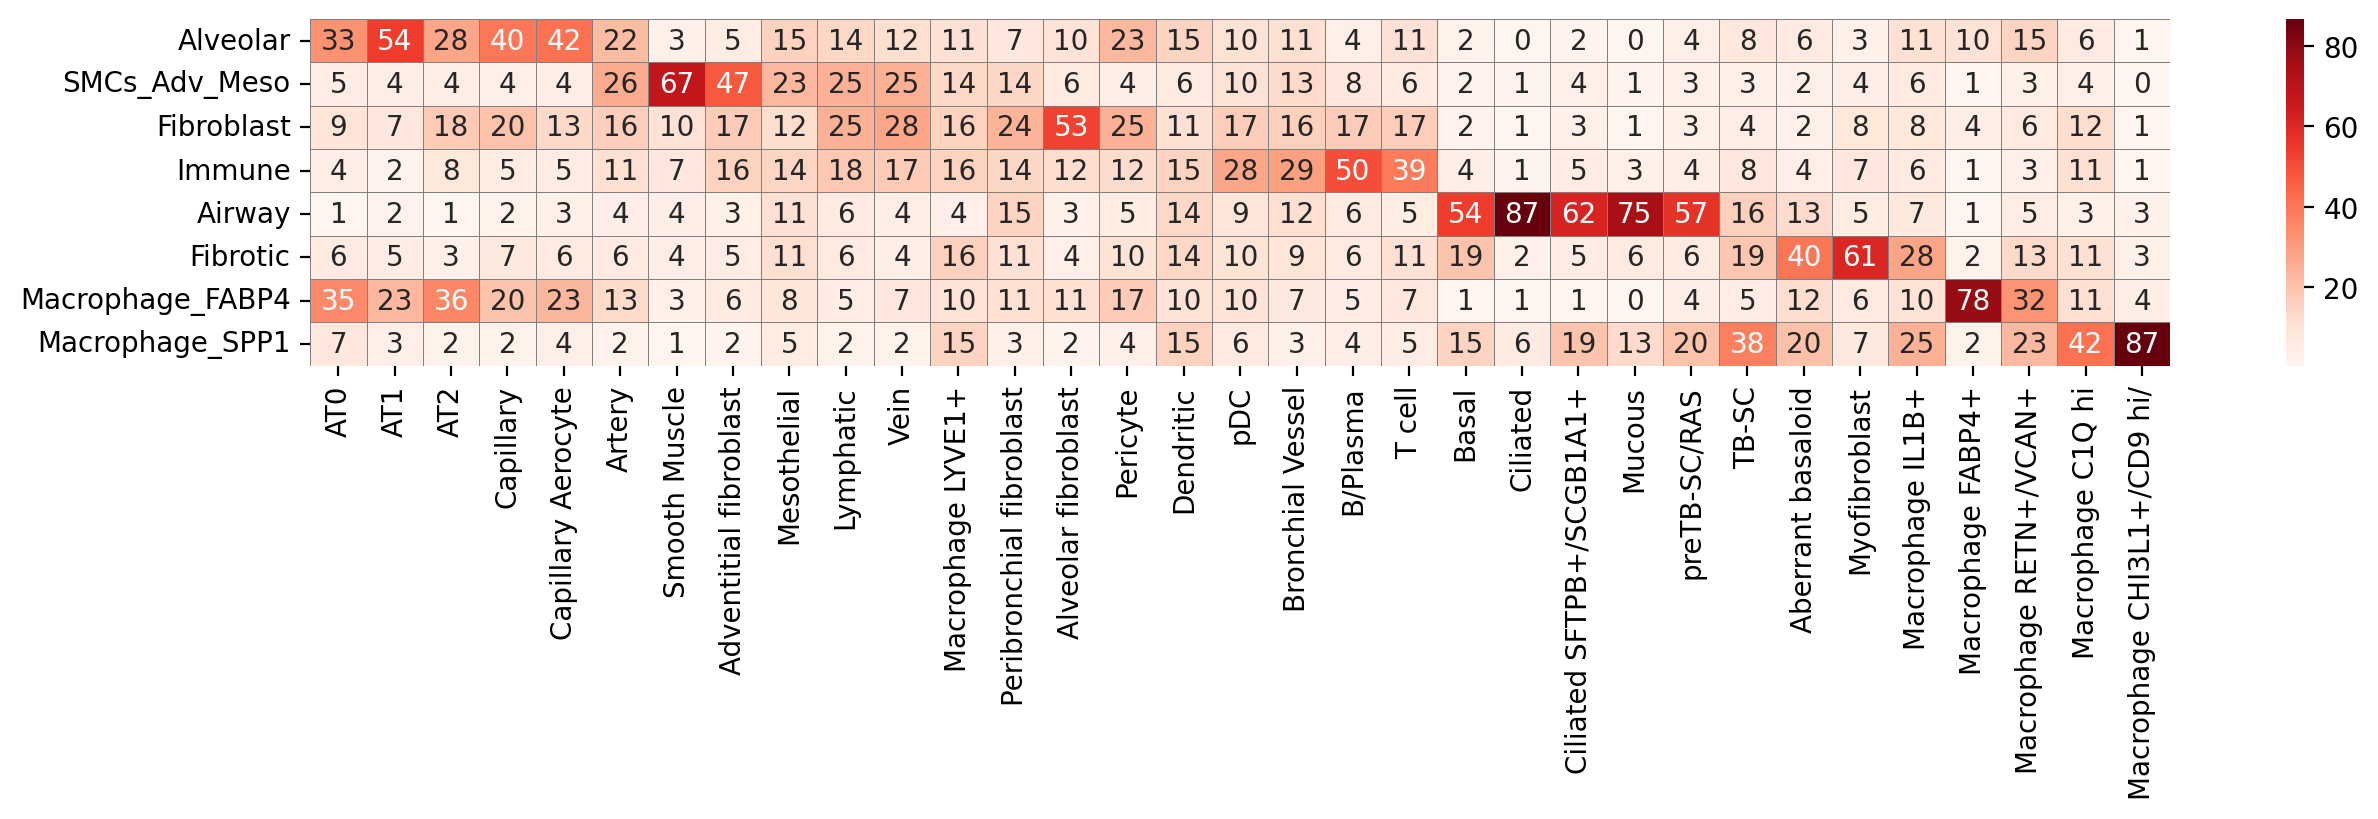

In [129]:
sb.reset_defaults()
plt.figure(figsize=(15, 2.25))
sb.heatmap(test_tab4, annot=True, cmap="Reds", fmt=".0f",linewidths=0.25, linecolor='grey', )
plt.savefig("./figures/NMF_niches_celltype_percentages.pdf")